<a class="anchor" id="2nd-bullet">

### 1.1. Import the needed libraries
    
</a>

In [364]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

# data partition
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer

# models
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

# metric
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from regressors import stats

# oversampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.feature_selection import RFE

# embedded methods
from sklearn.linear_model import LassoCV

import warnings
warnings.filterwarnings('ignore')

<a class="anchor" id="3rd-bullet">

### Import the dataset
    
</a>

In [267]:
df = pd.read_csv('train.csv')
df.set_index('Access_ID', inplace = True)
df.head(3)

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy
Access_ID,,,,,,,,,,,,,,,,
102863333,21-Mar-20,0,0.0,0,0.0,3,64.0,0.0000,0.0667,0.0,MacOSX,2,Portugal,1,Returner,0
103117814,20-May-20,0,0.0,0,0.0,23,684.5,0.0217,0.0449,0.0,Windows,2,France,6,Returner,0
103201891,4-Dec-20,0,0.0,0,0.0,8,95.0,0.0250,0.0583,0.0,Windows,4,Italy,1,Returner,0


<a class="anchor" id="4th-bullet">


## 3. Data Understanding

</a>



<a class="anchor" id="4th-bullet">


### 3.1 Logical Checks

</a>



In [268]:
#Check the info of the dataset
df.info()
#no missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 102863333 to 798444008
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        9999 non-null   object 
 1   AccountMng_Pages            9999 non-null   int64  
 2   AccountMng_Duration         9999 non-null   float64
 3   FAQ_Pages                   9999 non-null   int64  
 4   FAQ_Duration                9999 non-null   float64
 5   Product_Pages               9999 non-null   int64  
 6   Product_Duration            9999 non-null   float64
 7   GoogleAnalytics_BounceRate  9999 non-null   float64
 8   GoogleAnalytics_ExitRate    9999 non-null   float64
 9   GoogleAnalytics_PageValue   9999 non-null   float64
 10  OS                          9999 non-null   object 
 11  Browser                     9999 non-null   int64  
 12  Country                     9999 non-null   object 
 13  Type_of_Traffic     

In [269]:
#fix data types - will create dummy variables later
df.Type_of_Traffic = df.Type_of_Traffic.astype("str")
df.Browser = df.Browser.astype("str")
df["Date"]=pd.to_datetime(df["Date"])

In [270]:
# check distribution of target variable
print(df["Buy"].value_counts())
print("Percent of positive labels: " + str(round(df["Buy"].value_counts()[1]/len(df),2)))

0    8447
1    1552
Name: Buy, dtype: int64
Percent of positive labels: 0.16


In [271]:
#MISSING: checking the page values and duration variables

<a class="anchor" id="4th-bullet">


### 3.2 Data exploration

</a>



In [272]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountMng_Pages,9999.0,2.324232,3.340676,0.0,0.0000,1.0000,4.00000,27.0000
AccountMng_Duration,9999.0,81.205854,179.715545,0.0,0.0000,7.5000,92.20835,3398.7500
FAQ_Pages,9999.0,0.508051,1.279390,0.0,0.0000,0.0000,0.00000,24.0000
FAQ_Duration,9999.0,34.559101,139.796989,0.0,0.0000,0.0000,0.00000,2549.3750
Product_Pages,9999.0,31.685869,44.550277,0.0,7.0000,18.0000,38.00000,705.0000
Product_Duration,9999.0,1199.769430,1958.276304,0.0,183.5625,599.0000,1470.27080,63973.5222
GoogleAnalytics_BounceRate,9999.0,0.022305,0.048776,0.0,0.0000,0.0032,0.01680,0.2000
GoogleAnalytics_ExitRate,9999.0,0.043181,0.048845,0.0,0.0143,0.0251,0.05000,0.2000
GoogleAnalytics_PageValue,9999.0,5.963120,18.753626,0.0,0.0000,0.0000,0.00000,361.7637
Buy,9999.0,0.155216,0.362128,0.0,0.0000,0.0000,0.00000,1.0000


#### Observations:
- the dataset don't have null values
- it has outliers in some features - need to explore and solve them
- it has 9.999 observations and 15 features (9 numerical and 6 categorical)
- the dependent variable is 'Buy'

In [273]:
# split the dataset
X = df.drop('Buy', axis=1)
y = df['Buy']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=5, stratify=y)

In [274]:
# Define metric and non-metric features
non_metric_features = ['Date', 'OS', 'Browser', 'Country', 'Type_of_Traffic', 'Type_of_Visitor']
metric_features = X_train.columns.drop(non_metric_features).to_list()

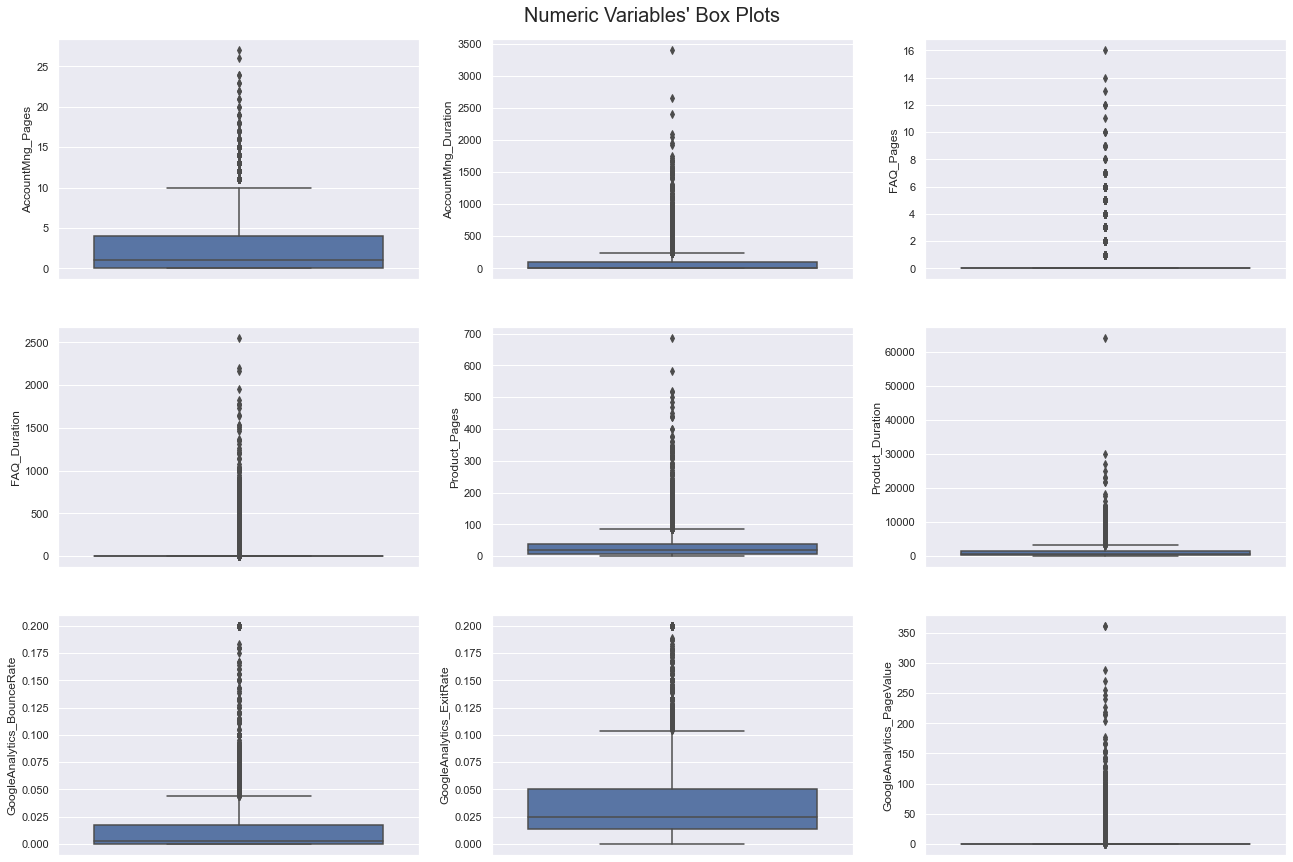

In [275]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize=(22, 15))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(y=X_train[feat], ax=ax)
    #ax.set_title(feat, y=-0.16)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title, y=0.91, fontsize=20)

# plt.savefig(os.path.join('..', 'figures', 'numeric_variables_boxplots.png'), dpi=200)
plt.show()

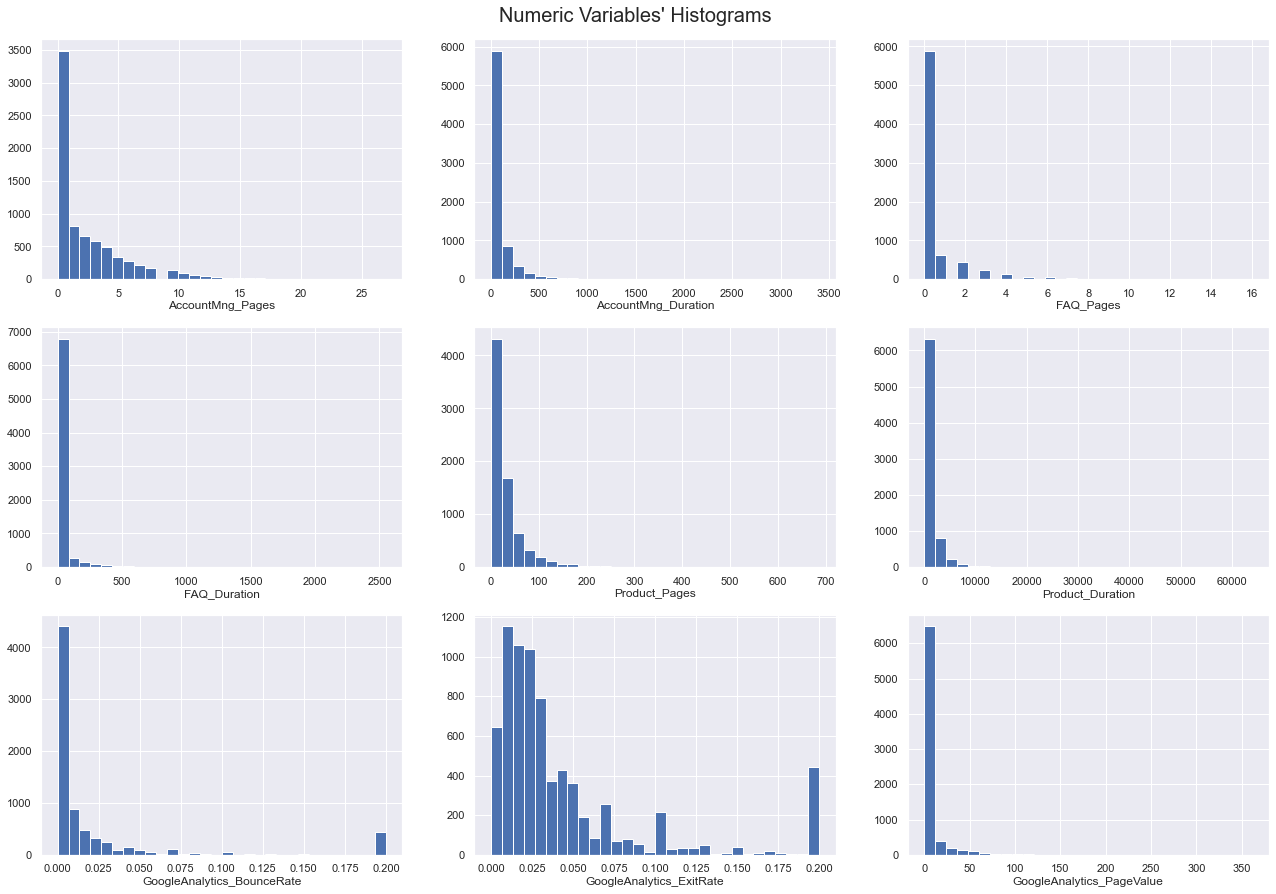

In [276]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize=(22, 15))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(X_train[feat], bins=30)
    ax.set_title(feat, y=-0.15)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title, y=0.91, fontsize=20)

# plt.savefig(os.path.join('..', 'figures', 'numeric_variables_histograms.png'), dpi=200)
plt.show()

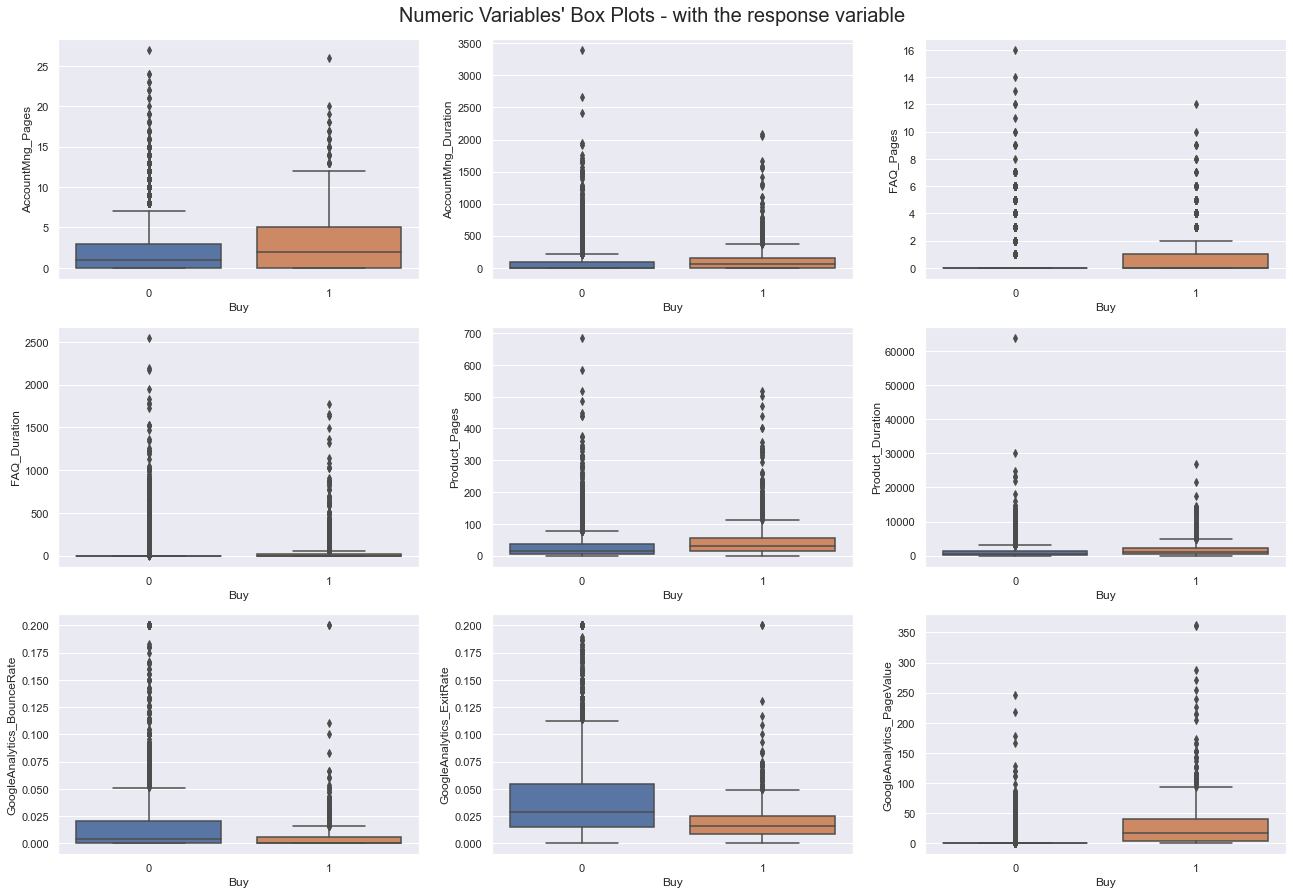

In [277]:
# All Numeric Variables' Box Plots in one figure - with the dependent variable
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize=(22, 15))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(y=X_train[feat], x=y_train, ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots - with the response variable"

plt.suptitle(title, y=0.91, fontsize=20)

# plt.savefig(os.path.join('..', 'figures', 'numeric_variables_boxplots.png'), dpi=200)
plt.show()

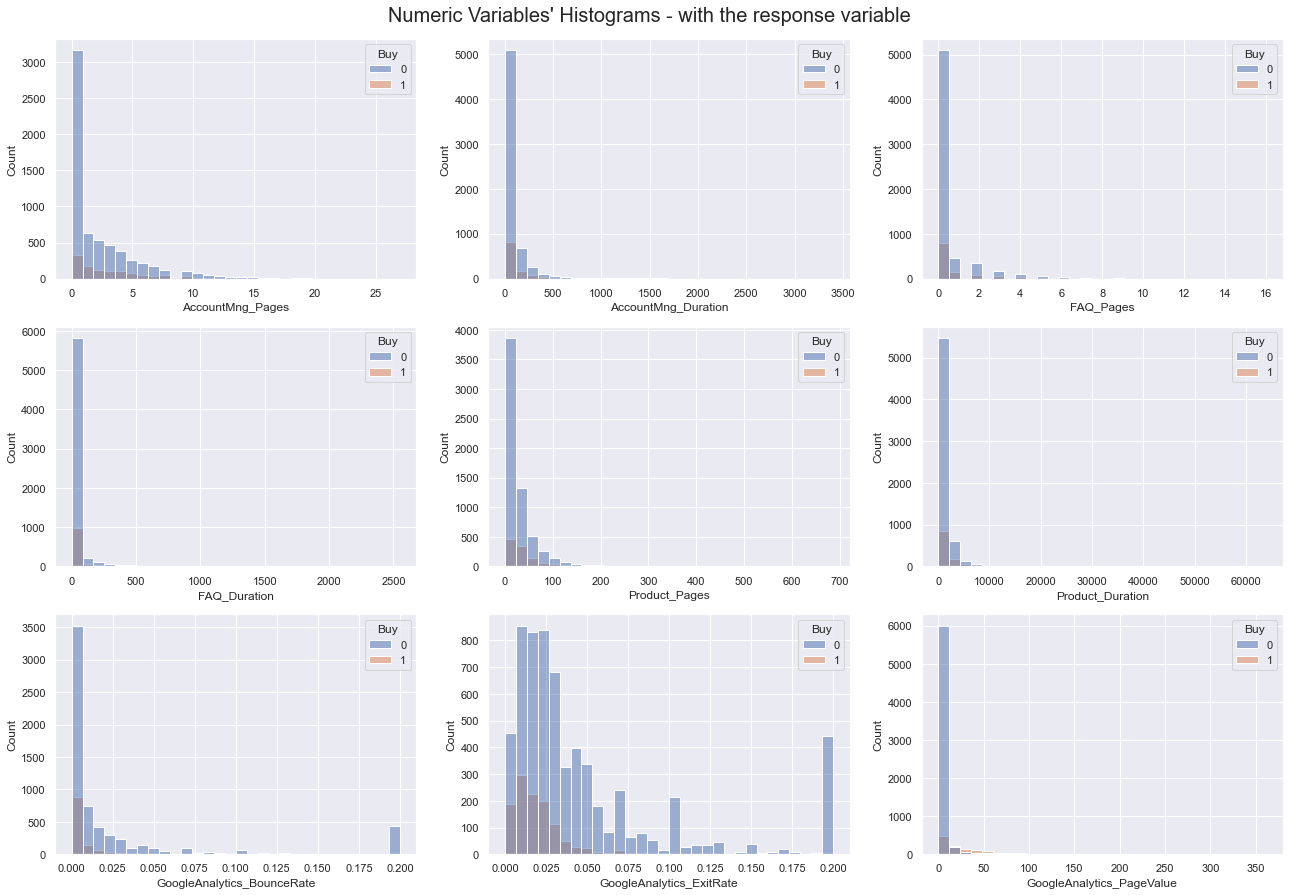

In [278]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize=(22, 15))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.histplot(data=X_train, x=feat, hue=y_train, ax=ax, bins=30)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms - with the response variable"

plt.suptitle(title, y=0.91, fontsize=20)

# plt.savefig(os.path.join('..', 'figures', 'numeric_variables_histograms.png'), dpi=200)
plt.show()

Observations:
- the dataset has outliers in all of the numeric features
- the data is right skewed in all of the numeric features, there is a lot of zero values in all features except in 'GoogleAnalytics_ExitRate'
- the distribution of the observations that didn't buy the products is very similar to those that bought the product. This means that it can be difficult to the model to learn the differences of these two groups

<a class="anchor" id="4th-bullet">


### 3.3 Outliers

</a>



In [279]:
#baseline model performance
X_train_num = X_train[metric_features]
X_val_num = X_val[metric_features]

In [280]:
#define model
model1 = LogisticRegression().fit(X_train_num, y_train)
y_pred_train = model1.predict(X_train_num)
y_pred_val = model1.predict(X_val_num)

#results
print('f1_train:', f1_score(y_train, y_pred_train))
print(confusion_matrix(y_val, y_pred_val))
print('precision:', precision_score(y_val, y_pred_val))
print('f1_val:', f1_score(y_val, y_pred_val))

f1_train: 0.4925201380897583
[[2063   49]
 [ 264  124]]
precision: 0.7167630057803468
f1_val: 0.4420677361853832


In [281]:
df_train = pd.concat([X_train, y_train], axis=1)
df_train_backup = df_train.copy()

In [282]:
#function to automatically remove outliers besed on the IQR, not currently in use
def outliers(df_train,metric_features):
    for variable in metric_features:
        var_mean = df_train[variable].mean()
        var_std = df_train[variable].std()
        df_train=df_train.loc[df_train[variable] < var_mean + (5 * var_std)]
        df_train=df_train.loc[df_train[variable] > var_mean - (5 * var_std)]
    return df_train
df_train = outliers(df_train,metric_features)

In [283]:
print('Percentage of data kept after removing outliers:', np.round(df_train.shape[0] / df_train_backup.shape[0], 4))

Percentage of data kept after removing outliers: 0.9593


In [284]:
#testing model performance after removing outliers
X_train_num = df_train.drop(['Buy'], axis=1)[metric_features]
y_train = df_train['Buy']

In [285]:
#define model
model2 = LogisticRegression().fit(X_train_num, y_train)
y_pred_train = model2.predict(X_train_num)
y_pred_val = model2.predict(X_val_num)

#results
print('f1_train:', f1_score(y_train, y_pred_train))
print(confusion_matrix(y_val, y_pred_val))
print('precision:', precision_score(y_val, y_pred_val))
print('f1_val:', f1_score(y_val, y_pred_val))

f1_train: 0.5087719298245614
[[2038   74]
 [ 247  141]]
precision: 0.6558139534883721
f1_val: 0.4676616915422886


In [286]:
#resetting the dataset
df_train = df_train_backup.copy()

In [287]:
# Manually defined tresholds for outliers using boxplots

filters1 = (
    (df_train['AccountMng_Duration']<=2000)
    &(df_train['AccountMng_Pages']<=20)
    &(df_train['GoogleAnalytics_BounceRate']<=.17)
    &(df_train['FAQ_Duration']<=1500)
    &(df_train['FAQ_Pages']<=13)
    &(df_train['Product_Pages']<=500)
    &(df_train['Product_Duration']<=25000)
    &(df_train['GoogleAnalytics_PageValue']<=300)
)

filters2 = (
    (df_train['AccountMng_Duration']<=2000)
    &
    (df_train['FAQ_Duration']<=2000)
    &
    (df_train['Product_Pages']<=650)
    &
    (df_train['Product_Duration']<=50000)
    &
    (df_train['GoogleAnalytics_PageValue']<=350)
)

df_train = df_train[filters1]

print('Percentage of data kept after removing outliers:', np.round(df_train.shape[0] / df_train_backup.shape[0], 4))

Percentage of data kept after removing outliers: 0.9365


In [288]:
#testing model performance after removing outliers using manual thresholds
X_train_num = df_train.drop(['Buy'], axis=1)[metric_features]
y_train = df_train['Buy']

In [289]:
#define model
model3 = LogisticRegression().fit(X_train_num, y_train)
y_pred_train = model3.predict(X_train_num)
y_pred_val = model3.predict(X_val_num)

#results
print('f1_train:', f1_score(y_train, y_pred_train))
print(confusion_matrix(y_val, y_pred_val))
print('precision:', precision_score(y_val, y_pred_val))
print('f1_val:', f1_score(y_val, y_pred_val))

f1_train: 0.49710982658959535
[[2058   54]
 [ 262  126]]
precision: 0.7
f1_val: 0.44366197183098594


Observations:
- at this stage, using automated outlier removal was the better option, but this was partially due to the inclusion of all numeric variables, like FAQ_Duration that has many outliers but not a lot of relevency. As we refine our variable selection, manual outlier selection produced a more accurate model. 
- filters2 is the result of finding the best outlier filters after feature selection, which we will use here to keep the results accurate to our report.

In [290]:
df_train = df_train_backup.copy()
df_train = df_train[filters2]
print('Percentage of data kept after removing outliers:', np.round(df_train.shape[0] / df_train_backup.shape[0], 4))

Percentage of data kept after removing outliers: 0.9987


<a class="anchor" id="4th-bullet">


## 4. Data Preparation

</a>



<a class="anchor" id="4th-bullet">


### 4.1 Feature Engineering and Transformation

</a>



In [291]:
X_train = df_train.drop(['Buy'], axis=1)
y_train = df_train['Buy']

In [292]:
#create dummy variables in train data:

#type of visitor
dict_visitor = {'Returner': 0, 'New_Access': 1, 'Other': 0}
X_train['Type_of_Visitor_new'] = X_train['Type_of_Visitor'].map(dict_visitor)
dict_visitor = {'Returner': 1, 'New_Access': 0, 'Other': 0}
X_train['Type_of_Visitor_return'] = X_train['Type_of_Visitor'].map(dict_visitor)

#type of traffic
X_train["Type_of_Traffic_high"]=X_train["Type_of_Traffic"].map(lambda x: 1 if (x in [7,8,15]) else 0)
X_train["Type_of_Traffic_med"]=X_train["Type_of_Traffic"].map(lambda x: 1 if (x in [10,11,2,5]) else 0)
X_train = pd.get_dummies(X_train, columns = ["Type_of_Traffic"], drop_first=True)

#create month variable from the date information 
X_train["Month"]=X_train["Date"].map(lambda x: x.month)
X_train["Months_high"]=X_train["Month"].map(lambda x: 1 if x>7 & x<12 else 0)
today = pd.to_datetime("2021-01-01")
X_train["Time_not_visited"]=X_train["Date"].map(lambda x: (today-x).days)

#OS
X_train["is_apple"]=X_train["OS"].map(lambda x: 1 if (x in ['iOS', 'MacOSX']) else 0)
X_train = pd.get_dummies(X_train, columns = ['OS'], drop_first=True)
X_train.drop('OS_Other', inplace=True, axis=1)

# same for validation data
#type of visitor
X_val['Type_of_Visitor_new'] = X_val['Type_of_Visitor'].map(dict_visitor)
X_val['Type_of_Visitor_return'] = X_val['Type_of_Visitor'].map(dict_visitor)

#type of traffic
X_val["Type_of_Traffic_high"]=X_val["Type_of_Traffic"].map(lambda x: 1 if (x in [7,8,15]) else 0)
X_val["Type_of_Traffic_med"]=X_val["Type_of_Traffic"].map(lambda x: 1 if (x in [10,11,2,5]) else 0)
X_val = pd.get_dummies(X_val, columns = ["Type_of_Traffic"], drop_first=True)

#create month variable from the date information 
X_val["Month"]=X_val["Date"].map(lambda x: x.month)
X_val["Months_high"]=X_val["Month"].map(lambda x: 1 if x>7 & x<12 else 0)
X_val["Time_not_visited"]=X_val["Date"].map(lambda x: (today-x).days)

#OS
X_val["is_apple"]=X_val["OS"].map(lambda x: 1 if (x in ['iOS', 'MacOSX']) else 0)
X_val = pd.get_dummies(X_val, columns = ['OS'], drop_first=True)

In [293]:
#engineering: time spent per page variables  
X_train["Mng"] = X_train.AccountMng_Duration/X_train.AccountMng_Pages
X_train["FAQ"] = X_train.FAQ_Duration/X_train.FAQ_Pages
X_train["Product"] = X_train.Product_Duration/X_train.Product_Pages
X_train.fillna(0, inplace=True)

X_val["Mng"] = X_val.AccountMng_Duration/X_val.AccountMng_Pages
X_val["FAQ"] = X_val.FAQ_Duration/X_val.FAQ_Pages
X_val["Product"] = X_val.Product_Duration/X_val.Product_Pages
X_val.fillna(0, inplace=True)

In [294]:
#engineering: Country data  
country_gdp_2019 = {
"Portugal": 79,         
"Spain": 91,              
"Brazil": 100,           
"France": 106,           
"Other": 100,             
"Italy": 96,            
"United Kingdom": 104,   
"Germany": 120,           
"Switzerland": 157
}
country_digital_2019 = {
"Portugal": 20.71,         
"Spain": 32.48,              
"Brazil": 62.03,           
"France": 52.84,           
"Other": 57.80,             
"Italy": 39.79,            
"United Kingdom": 72.77,   
"Germany": 	58.69,           
"Switzerland": 67.49
}

In [295]:
#engineering: Country data train
X_train["country_gdp_2019"] = X_train["Country"].apply(lambda x: country_gdp_2019[x])
X_train["country_digital_2019"] = X_train["Country"].apply(lambda x: country_digital_2019[x])
#engineering: Country data val
X_val["country_gdp_2019"] = X_val["Country"].apply(lambda x: country_gdp_2019[x])
X_val["country_digital_2019"] = X_val["Country"].apply(lambda x: country_digital_2019[x])

In [296]:
#creating log transormations of numeric variables 
#AccountMng_Pages
X_train["logAccountMng_Pages"]=X_train["AccountMng_Pages"].map(lambda x : 1 if x<=1 else x)
X_train["logAccountMng_Pages"]=np.log(X_train["logAccountMng_Pages"])
#AccountMng_Pages
X_train["logAccountMng_Duration"]=X_train["AccountMng_Duration"].map(lambda x : 1 if x<=1 else x)
X_train["logAccountMng_Duration"]=np.log(X_train["logAccountMng_Duration"])
#logFAQ_Pages
X_train["logFAQ_Pages"]=X_train["FAQ_Pages"].map(lambda x : 1 if x<=1 else x)
X_train["logFAQ_Pages"]=np.log(X_train["logFAQ_Pages"])

#AccountMng_Pages
X_val["logAccountMng_Pages"]=X_val["AccountMng_Pages"].map(lambda x : 1 if x<=1 else x)
X_val["logAccountMng_Pages"]=np.log(X_val["logAccountMng_Pages"])
#AccountMng_Pages
X_val["logAccountMng_Duration"]=X_val["AccountMng_Duration"].map(lambda x : 1 if x<=1 else x)
X_val["logAccountMng_Duration"]=np.log(X_val["logAccountMng_Duration"])
#logFAQ_Pages
X_val["logFAQ_Pages"]=X_val["FAQ_Pages"].map(lambda x : 1 if x<=1 else x)
X_val["logFAQ_Pages"]=np.log(X_val["logFAQ_Pages"])

In [297]:
#confirming the same variables were created for both sets
X_train.shape[1]==X_val.shape[1]

True

In [298]:
# Test of different types of scaling the numeric variables
# The Logistic Regression Model was tested only with the original numerical variables

X_train_num = X_train[['AccountMng_Pages', 'AccountMng_Duration', 'FAQ_Pages', 'FAQ_Duration', 'Product_Pages',
                       'Product_Duration', 'GoogleAnalytics_BounceRate', 'GoogleAnalytics_ExitRate',
                       'GoogleAnalytics_PageValue']]

#confirming the same variables were created for both sets
X_train_num.shape[1]==X_val_num.shape[1]

True

In [299]:
# MinMax [0,1]
min_max1 = MinMaxScaler(feature_range=(0,1)).fit(X_train_num)
min_max1_X_train = min_max1.transform(X_train_num)
min_max1_X_val = min_max1.transform(X_val_num)

#define model
model4 = LogisticRegression(random_state=5).fit(min_max1_X_train, y_train)
y_pred_train = model4.predict(min_max1_X_train)
y_pred_val = model4.predict(min_max1_X_val)

#results
print('f1_train:', f1_score(y_train, y_pred_train))
print(confusion_matrix(y_val, y_pred_val))
print('precision:', precision_score(y_val, y_pred_val))
print('f1_val:', f1_score(y_val, y_pred_val))

f1_train: 0.42131661442006274
[[2078   34]
 [ 292   96]]
precision: 0.7384615384615385
f1_val: 0.3706563706563707


In [300]:
# MinMax [-1,1]
min_max2 = MinMaxScaler(feature_range=(-1,1)).fit(X_train_num)
min_max2_X_train = min_max2.transform(X_train_num)
min_max2_X_val = min_max2.transform(X_val_num)

#define model
model5 = LogisticRegression(random_state=5).fit(min_max2_X_train, y_train)
y_pred_train = model5.predict(min_max2_X_train)
y_pred_val = model5.predict(min_max2_X_val)

#results
print('f1_train:', f1_score(y_train, y_pred_train))
print(confusion_matrix(y_val, y_pred_val))
print('precision:', precision_score(y_val, y_pred_val))
print('f1_val:', f1_score(y_val, y_pred_val))

f1_train: 0.4732461355529132
[[2071   41]
 [ 267  121]]
precision: 0.7469135802469136
f1_val: 0.44


In [301]:
# Standard Scaler
scaler = StandardScaler().fit(X_train_num)
scaler_X_train = scaler.transform(X_train_num)
scaler_X_val = scaler.transform(X_val_num)

#define model
model6 = LogisticRegression(random_state=5).fit(scaler_X_train, y_train)
y_pred_train = model6.predict(scaler_X_train)
y_pred_val = model6.predict(scaler_X_val)

#results
print('f1_train:', f1_score(y_train, y_pred_train))
print(confusion_matrix(y_val, y_pred_val))
print('precision:', precision_score(y_val, y_pred_val))
print('f1_val:', f1_score(y_val, y_pred_val))

f1_train: 0.4968152866242038
[[2066   46]
 [ 261  127]]
precision: 0.7341040462427746
f1_val: 0.45276292335115864


In [302]:
# Robust Scaler
robust = RobustScaler().fit(X_train_num)
robust_X_train = robust.transform(X_train_num)
robust_X_val = robust.transform(X_val_num)

#define model
model7 = LogisticRegression(random_state=5).fit(robust_X_train, y_train)
y_pred_train = model7.predict(robust_X_train)
y_pred_val = model7.predict(robust_X_val)

#results
print('f1_train:', f1_score(y_train, y_pred_train))
print(confusion_matrix(y_val, y_pred_val))
print('precision:', precision_score(y_val, y_pred_val))
print('f1_val:', f1_score(y_val, y_pred_val))

f1_train: 0.49391304347826087
[[2065   47]
 [ 261  127]]
precision: 0.7298850574712644
f1_val: 0.45195729537366547


In [303]:
#Power Transformation - using default method {‘yeo-johnson’},
power = PowerTransformer().fit(X_train_num)
power_X_train = power.transform(X_train_num)
power_X_val = power.transform(X_val_num)

#define model
model8 = LogisticRegression(random_state=5).fit(power_X_train, y_train)
y_pred_train = model8.predict(power_X_train)
y_pred_val = model8.predict(power_X_val)

#results
print('f1_train:', f1_score(y_train, y_pred_train))
print(confusion_matrix(y_val, y_pred_val))
print('precision:', precision_score(y_val, y_pred_val))
print('f1_val:', f1_score(y_val, y_pred_val))

f1_train: 0.6623432771292694
[[1992  120]
 [ 149  239]]
precision: 0.6657381615598886
f1_val: 0.6398929049531459


In [304]:
#Power transforming variables 
non_metric_features = X_train.columns.drop(metric_features).to_list()
#separate numeric and non-numeric
X_train_num = X_train[metric_features]
X_train_cat = X_train[non_metric_features]
# DO IT for validation
X_val_num = X_val[metric_features]
X_val_cat = X_val[non_metric_features]

In [305]:
#use train to power transform train
power = PowerTransformer().fit(X_train_num)
X_train_num_power = power.transform(X_train_num)
X_train_num_power = pd.DataFrame(X_train_num_power, columns = X_train_num.columns).set_index(X_train_num.index)

#and for validation (using train data)
X_val_num_power = power.transform(X_val_num)
# Convert the array to a pandas dataframe
X_val_num_power = pd.DataFrame(X_val_num_power, columns = X_val_num.columns).set_index(X_val_num.index)
X_val_num_power.head(3)

X_train_power = pd.concat([X_train_num_power, X_train_cat], axis=1)
X_val_power = pd.concat([X_val_num_power, X_val_cat], axis=1)

<a class="anchor" id="4th-bullet">


### 4.2 Feature Selection

</a>



In [307]:
#none of the features are univariate
X_train_num.var()

AccountMng_Pages              1.119390e+01
AccountMng_Duration           2.846111e+04
FAQ_Pages                     1.542735e+00
FAQ_Duration                  1.681263e+04
Product_Pages                 1.890272e+03
Product_Duration              3.113193e+06
GoogleAnalytics_BounceRate    2.396840e-03
GoogleAnalytics_ExitRate      2.416911e-03
GoogleAnalytics_PageValue     3.446348e+02
dtype: float64

In [308]:
all_train_num = X_train_num.join(y_train)
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()
#build correlation matrix
cor_spearman = all_train_num.corr(method ='spearman')

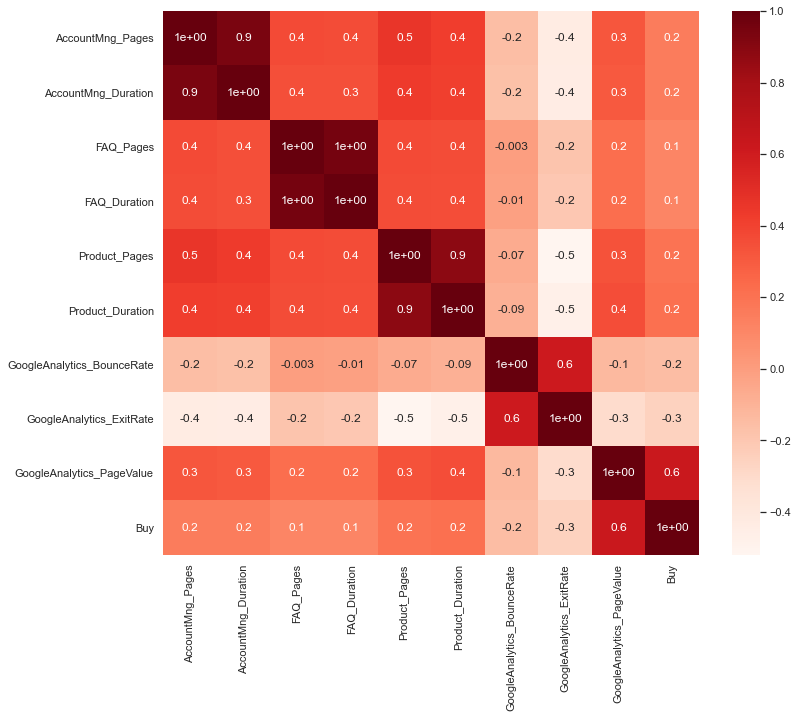

In [309]:
cor_heatmap(cor_spearman)

Observations:
- Features highly correlated (keep only one):
    - __'AccountMng_Pages'__ and __'AccountMng_Duration'__ (Number of pages visited and total amount of time spent by the user - account management related pages)
    - __'FAQ_Pages'__ and __'FAQ_Duration'__ (Number of pages visited and total amount of time spent by the user - FAQ related pages)
    - __'Product_Pages'__ and __'Product_Duration'__ (Number of pages visited and total amount of time spent by the user - Product related pages)
    - __'GoogleAnalytics_BounceRate'__ and __'GoogleAnalytics_ExitRate'__ (Bounce and exit rate, both explains the the exit rate of the pages visited by the user)

In [310]:
#lasso part 1: correlated features only
X_train_num_sub = X_train_num[['AccountMng_Pages', 'AccountMng_Duration', 'FAQ_Pages', 'FAQ_Duration',
       'Product_Pages', 'Product_Duration', 'GoogleAnalytics_BounceRate',
       'GoogleAnalytics_ExitRate']]

In [311]:
lasso1 = LogisticRegression(penalty='l1', solver='liblinear')
lasso1.fit(X_train_num_sub, y_train)
coef = pd.Series(lasso1.coef_[0], index = X_train_num_sub.columns)

In [312]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 7 variables and eliminated the other 1 variables


In [313]:
coef.sort_values()

GoogleAnalytics_ExitRate     -29.132420
AccountMng_Pages              -0.004053
Product_Pages                 -0.001885
GoogleAnalytics_BounceRate     0.000000
AccountMng_Duration            0.000134
Product_Duration               0.000155
FAQ_Duration                   0.000232
FAQ_Pages                      0.036757
dtype: float64

Observations:
- the number of pages visited variables were more valuable for the first three pairs, and ‘GoogleAnalytics_ExitRate’ was more important than ‘GoogleAnalytics_BounceRate’, so the latter variable was dropped for each of the above pairs.

In [314]:
# X_train_power.drop(["GoogleAnalytics_BounceRate","AccountMng_Duration","Product_Duration","FAQ_Duration"], inplace=True, axis=1)
# X_val_power.drop(["GoogleAnalytics_BounceRate","AccountMng_Duration","Product_Duration","FAQ_Duration"], inplace=True, axis=1)

In [315]:
#chi-squared test for categorical variables 
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [316]:
df_sub = df_train[['Date', 'OS', 'Browser', 'Country', 'Type_of_Traffic', 'Type_of_Visitor']]

In [317]:
for var in df_sub:
    TestIndependence(df_train[var],df_train["Buy"], var)

Date is IMPORTANT for Prediction
OS is IMPORTANT for Prediction
Browser is IMPORTANT for Prediction
Country is NOT an important predictor. (Discard Country from model)
Type_of_Traffic is IMPORTANT for Prediction
Type_of_Visitor is IMPORTANT for Prediction


In [318]:
# X_train_power.drop("Country",inplace=True,axis=1)
# X_val_power.drop("Country",inplace=True,axis=1)

In [319]:
X_train_num_power = X_train_power.select_dtypes(include=np.number).set_index(X_train_power.index)
X_val_num_power = X_val_power.select_dtypes(include=np.number).set_index(X_val_power.index)

In [320]:
#lasso regression part 2
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [323]:
lasso2 = LogisticRegression(penalty='l1', solver='liblinear', C=.4)
lasso2.fit(X_train_num_power, y_train)
coef = pd.Series(lasso2.coef_[0], index = X_train_num_power.columns)

In [324]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 28 variables and eliminated the other 17 variables


In [325]:
coef.sort_values()

Product_Pages                -0.643335
GoogleAnalytics_ExitRate     -0.433469
logAccountMng_Pages          -0.406580
Type_of_Traffic_13           -0.219594
is_apple                     -0.202229
FAQ_Duration                 -0.186219
Month                        -0.148724
GoogleAnalytics_BounceRate   -0.114983
logAccountMng_Duration       -0.092241
logFAQ_Pages                 -0.068711
Type_of_Visitor_return       -0.050548
OS_MacOSX                    -0.046431
Product                      -0.007049
Time_not_visited             -0.005807
country_gdp_2019             -0.003196
Type_of_Traffic_7             0.000000
OS_Ubuntu                     0.000000
OS_Fedora                     0.000000
OS_Chrome OS                  0.000000
country_digital_2019          0.000000
Type_of_Traffic_9             0.000000
OS_iOS                        0.000000
OS_Windows                    0.000000
Type_of_Traffic_5             0.000000
Type_of_Traffic_4             0.000000
AccountMng_Duration      

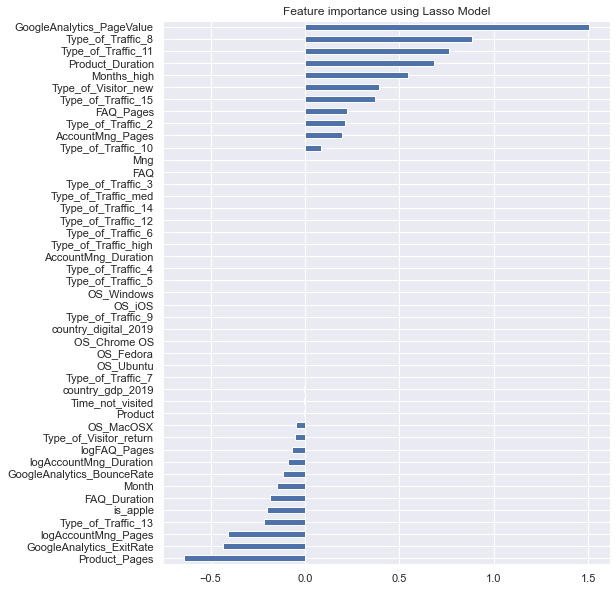

In [326]:
plot_importance(coef,'Lasso')

In [327]:
X_train_num_power.drop(['OS_Ubuntu','Type_of_Traffic_5','OS_Fedora',
                        'OS_Chrome OS','Type_of_Traffic_9','Type_of_Traffic_7',
                        'Type_of_Traffic_6','OS_Windows','Type_of_Traffic_3',
                        'Type_of_Traffic_14','Type_of_Traffic_12','Type_of_Traffic_med',
                        'Type_of_Traffic_high','Type_of_Visitor_new','Type_of_Traffic_4'], inplace=True, axis=1)
X_val_num_power.drop(['OS_Ubuntu','Type_of_Traffic_5','OS_Fedora',
                        'OS_Chrome OS','Type_of_Traffic_9','Type_of_Traffic_7',
                        'Type_of_Traffic_6','OS_Windows','Type_of_Traffic_3',
                        'Type_of_Traffic_14','Type_of_Traffic_12','Type_of_Traffic_med',
                        'Type_of_Traffic_high','Type_of_Visitor_new','Type_of_Traffic_4'], inplace=True, axis=1)

In [328]:
#RFE loop test with remaining variables

#no of features
nof_list=np.arange(1,27)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LogisticRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_num_power,y_train)
    X_val_rfe = rfe.transform(X_val_num_power)
    model.fit(X_train_rfe,y_train)
    
    score = model.score(X_val_rfe,y_val)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 10
Score with 10 features: 0.895200


In [330]:
model = LogisticRegression()
rfe = RFE(estimator = model, n_features_to_select = 10)
X_rfe = rfe.fit_transform(X = X_train_num_power, y = y_train)
selected_features = pd.Series(rfe.support_, index = X_train_num_power.columns)
selected_features

AccountMng_Pages              False
AccountMng_Duration           False
FAQ_Pages                     False
FAQ_Duration                  False
Product_Pages                 False
Product_Duration               True
GoogleAnalytics_BounceRate    False
GoogleAnalytics_ExitRate       True
GoogleAnalytics_PageValue      True
Type_of_Visitor_return         True
Type_of_Traffic_10            False
Type_of_Traffic_11             True
Type_of_Traffic_13             True
Type_of_Traffic_15             True
Type_of_Traffic_2             False
Type_of_Traffic_8              True
Month                         False
Months_high                    True
Time_not_visited              False
is_apple                      False
OS_MacOSX                     False
OS_iOS                        False
Mng                           False
FAQ                           False
Product                       False
country_gdp_2019              False
country_digital_2019          False
logAccountMng_Pages         

In [331]:
model = LogisticRegression()
rfe = RFE(estimator = model, n_features_to_select = 4)
X_rfe = rfe.fit_transform(X = X_train_num_power, y = y_train)
selected_features = pd.Series(rfe.support_, index = X_train_num_power.columns)
selected_features

AccountMng_Pages              False
AccountMng_Duration           False
FAQ_Pages                     False
FAQ_Duration                  False
Product_Pages                 False
Product_Duration              False
GoogleAnalytics_BounceRate    False
GoogleAnalytics_ExitRate      False
GoogleAnalytics_PageValue      True
Type_of_Visitor_return         True
Type_of_Traffic_10            False
Type_of_Traffic_11             True
Type_of_Traffic_13            False
Type_of_Traffic_15            False
Type_of_Traffic_2             False
Type_of_Traffic_8              True
Month                         False
Months_high                   False
Time_not_visited              False
is_apple                      False
OS_MacOSX                     False
OS_iOS                        False
Mng                           False
FAQ                           False
Product                       False
country_gdp_2019              False
country_digital_2019          False
logAccountMng_Pages         

Observations:
- Important variables include 'GoogleAnalytics_PageValue', 'Type_of_Visitor_return', 'Type_of_Traffic_11' and 'Type_of_Traffic_8'

<a class="anchor" id="4th-bullet">


### 4.3 Data Balancing

</a>



In [343]:
# Test of oversampling using RandomOverSampler method

ros = RandomOverSampler(random_state=5)
X_train_over_ros, y_train_over_ros = ros.fit_resample(X_train_num_power, y_train)

#define model
model9 = LogisticRegression(random_state=5).fit(X_train_over_ros, y_train_over_ros)
y_pred_train = model9.predict(X_train_over_ros)
y_pred_val = model9.predict(X_val_num_power)

#results
print('f1_train:', f1_score(y_train_over_ros, y_pred_train))
print(confusion_matrix(y_val, y_pred_val))
print('precision:', precision_score(y_val, y_pred_val))
print('f1_val:', f1_score(y_val, y_pred_val))

f1_train: 0.8453726453726454
[[1872  240]
 [  84  304]]
precision: 0.5588235294117647
f1_val: 0.6523605150214592


In [344]:
# Test of oversampling using SMOTE method

smote = SMOTE(random_state=5)
X_train_over_smt, y_train_over_smt = smote.fit_resample(X_train_num_power, y_train)

#define model
model10 = LogisticRegression(random_state=5).fit(X_train_over_smt, y_train_over_smt)
y_pred_train = model10.predict(X_train_over_smt)
y_pred_val = model10.predict(X_val_num_power)

#results
print('f1_train:', f1_score(y_train_over_smt, y_pred_train))
print(confusion_matrix(y_val, y_pred_val))
print('precision:', precision_score(y_val, y_pred_val))
print('f1_val:', f1_score(y_val, y_pred_val))

f1_train: 0.8731762065095399
[[1876  236]
 [  86  302]]
precision: 0.5613382899628253
f1_val: 0.652267818574514


In [346]:
# Test Undersamplig - buy = 20% 

#joining y_train and x_train
under_df = pd.concat([X_train_num_power,y_train],axis=1)

#we randomly undersample our negative data until negatives our buy rate is 20% 
negative = under_df.loc[under_df.Buy==0]
positive = under_df.loc[under_df.Buy==1]

# shuffling the negative data
negative = negative.sample(frac=1, random_state=0)

# selecting 4 times the length of positive data
negative_under = negative[:int(4*len(positive))]

# concatinating dataset
df_under = pd.concat([positive,negative_under],axis=0)

#shuffling
df_under = df_under.sample(frac=1, random_state=0)

# After undersampling
X_train_under_20 = df_under.drop('Buy', axis=1)
y_train_under_20 = df_under['Buy']

#define model
model11 = LogisticRegression(random_state=5).fit(X_train_under_20, y_train_under_20)
y_pred_train = model11.predict(X_train_under_20)
y_pred_val = model11.predict(X_val_num_power)

#results
print('f1_train:', f1_score(y_train_under_20, y_pred_train))
print(confusion_matrix(y_val, y_pred_val))
print('precision:', precision_score(y_val, y_pred_val))
print('f1_val:', f1_score(y_val, y_pred_val))

f1_train: 0.703924914675768
[[1960  152]
 [ 125  263]]
precision: 0.6337349397590362
f1_val: 0.6550435865504359


Observations:
- Both Oversampling methods resulted in overfitting the model with the train data
- The Undersampling method had a better result, it overfitted to the train data a little, but had a better f1 score in the Validation data.

<a class="anchor" id="4th-bullet">


## 5. Modeling

</a>

In [352]:
X_train_model = X_train_num_power.copy()
y_train_model = y_train.copy()
X_val_model = X_val_num_power.copy()
y_val_model = y_val.copy()

In [ ]:
# MISSING - run the test with all the models - boxplot f1 score

<a class="anchor" id="4th-bullet">


### 5.3 Random Forest

</a>

In [359]:
def calculate_F1_rf(interval, parameter, max_depth = None):
    train_results = []
    test_results = []
       
    for value in interval:
        rf = RandomForestClassifier(max_depth = value, class_weight='balanced', random_state=5)
        rf.fit(X_train_model, y_train_model)
        train_pred = rf.predict(X_train_model)
        f1_train = f1_score(y_train_model, train_pred)
        train_results.append(f1_train)
        
        val_pred = rf.predict(X_val_model)
        f1_val = f1_score(y_val_model, val_pred)
        test_results.append(f1_val)
            
    print('The best f1 score for train is ' + str(max(train_results)) + ' for the depth of ' + str(train_results.index(max(train_results))+1))
    print('The best f1 score for val is ' + str(max(test_results)) + ' for the depth of ' + str(test_results.index(max(test_results))+1))
        
    fig, ax = plt.subplots(1,1,figsize=(8,6))
    plt.plot(interval, train_results, label = "Train F1")
    plt.plot(interval, test_results, label = "Val F1")
    plt.xticks(interval)
    plt.legend()
    plt.ylabel("F1 score")
    plt.xlabel(str(parameter))
    plt.show(ax)

The best f1 score for train is 0.9991379310344828 for the depth of 20
The best f1 score for val is 0.665083135391924 for the depth of 11


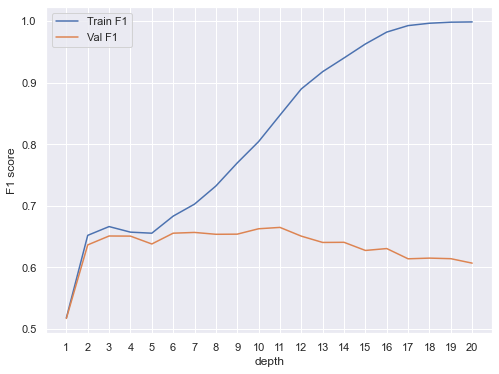

In [360]:
calculate_F1_rf(np.arange(1,21), 'depth')

Observations:
- Even if the best f1 score for the validation datadet is with a depth of 11, at this point the model is overfitting, since the f1 score for the train dataset is ~0.85
- To avoid overfitting it was selected the max_depth=6 as a better parameter.

<a class="anchor" id="4th-bullet">


## 6.   Evaluation 

</a>
<a class="anchor" id="4th-bullet">


### 6.1   Boosting/Stacking

</a>

In [365]:
# Testing different model to select two of them to try Stacking method

lr = LogisticRegression(class_weight='balanced', random_state=10)
nb = GaussianNB()
kn = KNeighborsClassifier()
dt = DecisionTreeClassifier(max_depth=3, class_weight='balanced', random_state=10)
nn = MLPClassifier(max_iter=5000, random_state=10)
bg = BaggingClassifier(random_state=10)
ab = AdaBoostClassifier(random_state=10)
rf = RandomForestClassifier(max_depth = 6, class_weight='balanced', random_state=10)
gb = GradientBoostingClassifier(random_state=10)

In [374]:
# define a function to return the f1 score for each model
def return_f1score(model):
    model_fit = model.fit(X_train_model, y_train)
    y_pred_val = model_fit.predict(X_val_model)
    score = f1_score(y_val, y_pred_val)
    return score

<AxesSubplot:xlabel='models', ylabel='f1'>

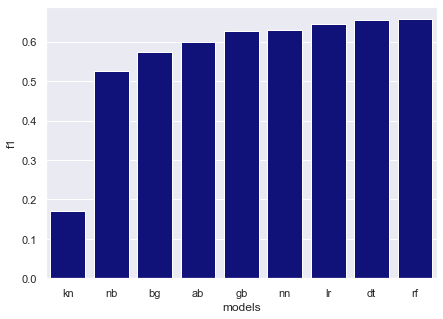

In [375]:
# define the models tested
models = [lr, nb, kn, dt, nn, bg, ab, rf, gb]

# create a list to store the f1 scores
f1_scores = []

# loop into each model and append the f1 score
for model in models:
    f1_scores.append(return_f1score(model))

# define a list of the names of the models as strings to use in the plot
names = ['lr', 'nb', 'kn', 'dt', 'nn', 'bg', 'ab', 'rf', 'gb']

# create a dataframe with a column as the model and another column as the f1 score - to use in the plot
df_models = pd.DataFrame()
df_models['models'] = names
df_models['f1'] = f1_scores
df_models = df_models.sort_values(by='f1')

fig, ax = plt.subplots(1,1,figsize=(7,5))
sns.barplot(data=df_models, x='models', y='f1', color='darkblue')

In [376]:
df_models.sort_values(by='f1', ascending=False)

,models,f1
7,rf,0.656410
3,dt,0.655172
0,lr,0.645503
4,nn,0.630749
8,gb,0.627737
6,ab,0.599432
5,bg,0.573171
1,nb,0.526037
2,kn,0.170132


In [377]:
# Since the ebest two models have similar aproaches - Random Forest and Decision,
# it was chosen to use a Satcking ensemble method with Random Forest and Logistic Regression

estimators = [('rf', RandomForestClassifier(max_depth = 6, class_weight='balanced', random_state=10)),
              ('lr', LogisticRegression(class_weight='balanced', random_state = 10))]

st = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

<AxesSubplot:xlabel='models', ylabel='f1'>

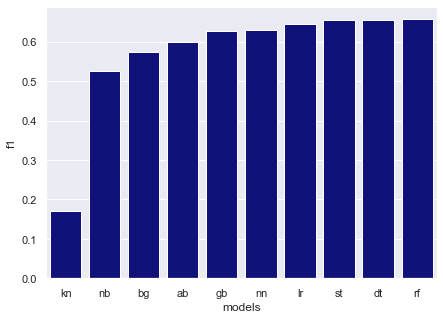

In [378]:
models = [lr, nb, kn, dt, nn, bg, ab, rf, gb, st]
f1_scores = []
for model in models:
    f1_scores.append(return_f1score(model))
    
names = ['lr', 'nb', 'kn', 'dt', 'nn', 'bg', 'ab', 'rf', 'gb', 'st']

df_models = pd.DataFrame()
df_models['models'] = names
df_models['f1'] = f1_scores
df_models = df_models.sort_values(by='f1')

fig, ax = plt.subplots(1,1,figsize=(7,5))
sns.barplot(data=df_models, x='models', y='f1', color='darkblue')

In [379]:
df_models.sort_values(by='f1', ascending=False)

,models,f1
7,rf,0.656410
3,dt,0.655172
9,st,0.654639
0,lr,0.645503
4,nn,0.630749
8,gb,0.627737
6,ab,0.599432
5,bg,0.573171
1,nb,0.526037
2,kn,0.170132
